# Species Distribution Modelling (SDM)

Also called Habitat Suitability Modelling

## 1. Create Vector Sighting Data

 * Import the pandas and geopandas modules needed for this first step.
 * Define the file path to the sighting CSV file
 * Read the CSV file using pandas into a Dataframe
 * Convert Dataframe to a geopandas GeoDataframe - using Lat / Lon (WSG84)
 * Reproject the GeoDataframe to OSGB (ESPG:27700)
 * Save as a GeoJSON file which can then be loaded within the GIS

In [1]:
import geopandas
import pandas

In [2]:
sighting_data_csv = "../data/sdm/sightings/Chrysolina_cerealis.csv"

In [4]:
cc_data_df = pandas.read_csv(sighting_data_csv, header=0)
cc_data_df.head()

,Scientific name,Common name,Occurrence status,Year,Latitude (WGS84),Longitude (WGS84),Coordinate uncertainty (m),Recorder,Individual count,Institution code
0,Chrysolina cerealis,Rainbow Leaf Beetle,present,1978.0,53.06999,-4.05370,1000,John Parry,13.0,NRW
1,Chrysolina cerealis,Rainbow Leaf Beetle,present,1902.0,53.06999,-4.05370,1000,J. Chappell,13.0,NRW
2,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08743,-4.08439,1000,Unknown,1.0,NRW
3,Chrysolina cerealis,Rainbow Leaf Beetle,present,2007.0,53.08164,-4.08464,1,Michael Shackshaft,1.0,NRW
4,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08158,-4.08486,100,Adrian Fowles,1.0,NRW


In [8]:
cc_geo_data_gdf = geopandas.GeoDataFrame(
    cc_data_df,
    geometry=geopandas.points_from_xy(
        cc_data_df["Longitude (WGS84)"], cc_data_df["Latitude (WGS84)"]
    ),
    crs="EPSG:4326",
)
cc_geo_data_gdf.head()

,Scientific name,Common name,Occurrence status,Year,Latitude (WGS84),Longitude (WGS84),Coordinate uncertainty (m),Recorder,Individual count,Institution code,geometry
0,Chrysolina cerealis,Rainbow Leaf Beetle,present,1978.0,53.06999,-4.05370,1000,John Parry,13.0,NRW,POINT (-4.05370 53.06999)
1,Chrysolina cerealis,Rainbow Leaf Beetle,present,1902.0,53.06999,-4.05370,1000,J. Chappell,13.0,NRW,POINT (-4.05370 53.06999)
2,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08743,-4.08439,1000,Unknown,1.0,NRW,POINT (-4.08439 53.08743)
3,Chrysolina cerealis,Rainbow Leaf Beetle,present,2007.0,53.08164,-4.08464,1,Michael Shackshaft,1.0,NRW,POINT (-4.08464 53.08164)
4,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08158,-4.08486,100,Adrian Fowles,1.0,NRW,POINT (-4.08486 53.08158)


In [10]:
cc_geo_osgb_data_gdf = cc_geo_data_gdf.to_crs(epsg=27700)
cc_geo_osgb_data_gdf.head()

,Scientific name,Common name,Occurrence status,Year,Latitude (WGS84),Longitude (WGS84),Coordinate uncertainty (m),Recorder,Individual count,Institution code,geometry
0,Chrysolina cerealis,Rainbow Leaf Beetle,present,1978.0,53.06999,-4.05370,1000,John Parry,13.0,NRW,POINT (262500.145 354498.456)
1,Chrysolina cerealis,Rainbow Leaf Beetle,present,1902.0,53.06999,-4.05370,1000,J. Chappell,13.0,NRW,POINT (262500.145 354498.456)
2,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08743,-4.08439,1000,Unknown,1.0,NRW,POINT (260500.630 356497.596)
3,Chrysolina cerealis,Rainbow Leaf Beetle,present,2007.0,53.08164,-4.08464,1,Michael Shackshaft,1.0,NRW,POINT (260465.146 355854.086)
4,Chrysolina cerealis,Rainbow Leaf Beetle,present,1989.0,53.08158,-4.08486,100,Adrian Fowles,1.0,NRW,POINT (260450.218 355847.842)


In [87]:
cc_geo_osgb_data_gdf.to_file("Chrysolina_cerealis_osgb.geojson", driver="GeoJSON")

## Rasterise the Study Site Layer

In [12]:
import rsgislib
import rsgislib.vectorutils.createrasters

In [13]:
# Study Site Vector
study_site_vec_file = "../data/sdm/environmental_data/Study_Area.geojson"
study_site_vec_lyr = "Study_Area"

# Elevation Image is used as the reference for
# Project and Pixel Size
elevation_img = "../data/sdm/environmental_data/elevation.tif"

# Output Study Site Image
study_site_img = "Study_Area.tif"

In [14]:
# Rasterise the Study Site Layer
rsgislib.vectorutils.createrasters.rasterise_vec_lyr(
    vec_file=study_site_vec_file,
    vec_lyr=study_site_vec_lyr,
    input_img=elevation_img,
    output_img=study_site_img,
    gdalformat="GTIFF",
    burn_val=1,
    datatype=rsgislib.TYPE_8UINT,
    att_column=None,
    use_vec_extent=False,
    thematic=True,
    no_data_val=0,
)

Creating output image using input image

Running Rasterise now...


Calculating Image Pyramids.




## Rasterise Phase 1 (Vegetation Classification)

https://datamap.gov.wales/layergroups/geonode:nrw_terrestrial_phase_1_habitat_survey

In [18]:
phase1_vec_file = "../data/sdm/environmental_data/Phase1_Veg.geojson"
phase1_vec_lyr = "Phase1_Veg"

In [19]:
# Output Study Site Image
phase1_img = "Phase1_Cat.tif"

In [20]:
# Rasterise the Phase 1 Vector layer where the
# pixel values will be from the "Class" column.
rsgislib.vectorutils.createrasters.rasterise_vec_lyr(
    vec_file=phase1_vec_file,
    vec_lyr=phase1_vec_lyr,
    input_img=elevation_img,
    output_img=phase1_img,
    gdalformat="GTIFF",
    burn_val=None,
    datatype=rsgislib.TYPE_8UINT,
    att_column="Class",
    use_vec_extent=False,
    thematic=True,
    no_data_val=0,
)

Creating output image using input image

Running Rasterise now...


Calculating Image Pyramids.




### Create a Phase 1 Habitat Codes and Class Look Up Table

In [32]:
import math

In [33]:
phase1_gdf = geopandas.read_file(phase1_vec_file, layer=phase1_vec_lyr)
phase1_gdf.head()

,Label,Phase1_Cod,Class,geometry
0,"Mosaic of:50% B.1.1,50% E.2.1",mosaic,46.0,"MULTIPOLYGON (((259898.030 353244.910, 259934...."
1,"Mosaic of:98% B.1.1,2% E.2.1",mosaic,46.0,"MULTIPOLYGON (((260094.822 352569.765, 259949...."
2,"Mosaic of:98% B.1.1,2% C.2",mosaic,46.0,"MULTIPOLYGON (((260398.560 355776.160, 260409...."
3,B.1.1,B.1.1,5.0,"MULTIPOLYGON (((258046.320 352360.501, 257491...."
4,B.4,B.4,9.0,"MULTIPOLYGON (((257491.331 352376.345, 257444...."


In [37]:
cls_id_lut = dict()
for index, row in phase1_gdf.iterrows():
    if not math.isnan(row["Class"]):
        cls_id = int(row["Class"])
        if (cls_id > 0) and (cls_id not in cls_id_lut):
            cls_name = row["Phase1_Cod"]
            if cls_name != "NA":
                cls_id_lut[cls_id] = row["Phase1_Cod"]

In [68]:
cls_id_lut

{46: 'mosaic',
 5: 'B.1.1',
 9: 'B.4',
 6: 'B.1.2',
 25: 'E.2.1',
 17: 'D.2',
 32: 'G.2',
 39: 'I.2.2',
 10: 'B.5',
 4: 'A.2.1',
 7: 'B.2.2',
 16: 'D.1.1',
 31: 'G.1',
 43: 'J.3.6',
 1: 'A.1.1.1',
 13: 'C.1.1',
 38: 'I.2.1',
 44: 'J.3.7',
 12: 'B.5.2',
 35: 'I.1.2.1',
 19: 'D.5',
 34: 'I.1.2',
 24: 'E.2',
 42: 'J.1.5',
 40: 'J.1.2',
 41: 'J.1.3',
 3: 'A.1.2.2',
 21: 'E.1.6.1',
 23: 'E.1.8',
 45: 'J.4',
 37: 'I.1.4.1',
 14: 'C.2',
 15: 'C.3.2',
 36: 'I.1.4',
 26: 'E.2.3',
 11: 'B.5.1',
 29: 'E.4',
 18: 'D.3',
 28: 'E.3.2',
 22: 'E.1.7',
 20: 'D.6',
 27: 'E.3',
 30: 'F.1',
 2: 'A.1.1.2',
 8: 'B.3.1',
 33: 'I.1'}

In [41]:
phase1_codes_df = pandas.read_excel(
    "../data/sdm/Phase1-Habitat-DominantSpecies-codes-2008.xlsx",
    sheet_name="Habitat list",
)
phase1_codes_df.head()

,JNCC Phase 1 habitat survey handbook code,1st level category,2nd level category,3rd level category,4th level category,JNCC Phase 1 habitat survey handbook name,Phase 1 habitat survey of Wales code,Phase 1 habitat survey of Wales name
0,A,A,NaN,NaN,NaN,Woodland and scrub,NaN,NaN
1,A1,NaN,A1,NaN,NaN,Woodland,NaN,NaN
2,A1.1,NaN,NaN,A1.1,NaN,Broadleaved woodland - semi-natural,NaN,NaN
3,A1.1.1,NaN,NaN,NaN,A1.1.1,Broadleaved woodland - semi-natural,A.1.1.1,Semi-natural broadleaved woodland
4,A1.1.2,NaN,NaN,NaN,A1.1.2,Broadleaved woodland - plantation,A.1.1.2,Planted broadleaved woodland


In [58]:
cls_names_lut = dict()
for index, row in phase1_codes_df.iterrows():
    cls_name = f"{row["Phase 1 habitat survey of Wales code"]}"
    if (cls_name != "" and cls_name != "?" and cls_name.lower() != "nan") and (
        cls_name not in cls_names_lut
    ):
        cls_hab_name = f"{row["Phase 1 habitat survey of Wales name"]}"
        if cls_hab_name != "" and cls_hab_name.lower() != "nan":
            cls_names_lut[cls_name] = cls_hab_name

In [59]:
cls_names_lut

{'A.1.1.1': 'Semi-natural broadleaved woodland',
 'A.1.1.2': 'Planted broadleaved woodland',
 'A.1.2.1': 'Semi-natural coniferous woodland',
 'A.1.2.2': 'Planted coniferous woodland',
 'A.1.3.1': 'Semi-natural mixed woodland',
 'A.1.3.2': 'Planted mixed woodland',
 'A.2.1': 'Dense scrub',
 'A.2.2': 'Scattered scrub',
 'A.3.1': 'Scattered broadleaved trees',
 'A.3.2': 'Scattered coniferous trees',
 'A.3.3': 'Scattered mixed trees',
 'A.4.1': 'Felled broadleaved woodland',
 'A.4.2': 'Felled coniferous woodland',
 'A.4.3': 'Felled mixed woodland',
 'B.1.1': 'Unimproved acid grassland',
 'B.1.2': 'Semi-improved acid grassland',
 'B.2.1': 'Unimproved neutral grassland',
 'B.2.2': 'Semi-improved neutral grassland',
 'B.3.1': 'Unimproved calcareous grassland',
 'B.3.2': 'Semi-improved calcareous grassland',
 'B.4': 'Improved grassland',
 'B.5': 'Marshy grassland',
 'B.5.1': 'Marshy grassland Juncus dominated',
 'B.5.2': 'Marshy grassland Molinia dominated',
 'C.1.1': 'Bracken',
 'C.1.2': 'Sca

Using these two look up tables we should be able to find the names of the classes associated with the pixel values within the region of Phase 1 which we have rasterised.

Let's try and example: 

In [60]:
pixel_val = 9
print(cls_names_lut[cls_id_lut[pixel_val]])

Improved grassland


In [61]:
pixel_val = 13
print(cls_names_lut[cls_id_lut[pixel_val]])

Bracken


## Create Phase 1 Habitat Distance Images

Land cover and habitat maps are typically not ideal for species distribution modelling as the sighting could be within a neighbouring pixel to land cover which that species is associated with but the model would not know that. 

Therefore, it is useful to calculate the distance to each of the land covers and we will enter the distance images into the model rather than the categorical data.

In [76]:
import os

import rsgislib.imagecalc
import rsgislib.imageutils
import rsgislib.tools.utils

In [77]:
# Set up RSGISLib to output compressed and tiled GTIFFs
rsgislib.imageutils.set_env_vars_lzw_gtiff_outs(bigtiff=False)

In [78]:
phase1_dist_dir = "phase1_dist_imgs"
if not os.path.exists(phase1_dist_dir):
    os.mkdir(phase1_dist_dir)

In [80]:
for cls_pxl_id in cls_id_lut:
    phase1_code = cls_id_lut[cls_pxl_id]
    calc_dist = False
    if phase1_code in cls_names_lut:
        print(cls_names_lut[phase1_code])
        phase1_cls_name_str = rsgislib.tools.utils.check_str(
            cls_names_lut[phase1_code],
            rm_non_ascii=True,
            rm_dashs=True,
            rm_spaces=True,
            rm_punc=True,
        )
        print(f"\t{phase1_cls_name_str}")
        dist_img = os.path.join(phase1_dist_dir, f"{phase1_cls_name_str}_dist.tif")
        calc_dist = True
    elif phase1_code == "mosaic":
        dist_img = os.path.join(phase1_dist_dir, "mosaic_dist.tif")
        calc_dist = True
    if calc_dist:
        rsgislib.imagecalc.calc_dist_to_img_vals(
            phase1_img,
            dist_img,
            pxl_vals=[cls_pxl_id],
            img_band=1,
            gdalformat="GTIFF",
            max_dist=None,
            no_data_val=None,
            out_no_data_val=-9999,
            unit_geo=True,
        )
        rsgislib.imageutils.pop_img_stats(
            dist_img, use_no_data=True, no_data_val=-9999, calc_pyramids=True
        )


101it [00:00, 980.54it/s]                                                                                                                                                                                            





Calculating Image Pyramids.


Unimproved acid grassland
	Unimproved_acid_grassland



101it [00:00, 2037.88it/s]                                                                                                                                                                                           





Calculating Image Pyramids.


Improved grassland
	Improved_grassland



  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2085.10it/s]                                                                                                                                                                                           



Semi-improved acid grassland
	Semi_improved_acid_grassland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2146.61it/s]                                                                                                                                                                                           


Acid/neutral flush

	Acidneutral_flush

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 1924.20it/s]                                                                                                                                                                                           



Wet heath
	Wet_heath

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2106.89it/s]                                                                                                                                                                                           



Running water
	Running_water

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2073.12it/s]                                                                                                                                                                                           



Spoil
	Spoil

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2059.17it/s]                                                                                                                                                                                           



Marshy grassland
	Marshy_grassland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2132.96it/s]                                                                                                                                                                                           



Dense scrub
	Dense_scrub

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2122.03it/s]                                                                                                                                                                                           


Semi-improved neutral grassland

	Semi_improved_neutral_grassland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2139.99it/s]                                                                                                                                                                                           


Dry acid heath
	Dry_acid_heath

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 1847.22it/s]                                                                                                                                                                                           


Standing water

	Standing_water

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2122.70it/s]                                                                                                                                                                                           



Buildings
	Buildings

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2036.54it/s]                                                                                                                                                                                           


Semi-natural broadleaved woodland

	Semi_natural_broadleaved_woodland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2003.48it/s]                                                                                                                                                                                           


Bracken

	Bracken

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 1998.93it/s]                                                                                                                                                                                           



Quarry
	Quarry

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2198.66it/s]                                                                                                                                                                                           



Track (not comprehensively digitised)
	Track_not_comprehensively_digitised

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 1916.07it/s]                                                                                                                                                                                           



Marshy grassland Molinia dominated
	Marshy_grassland_Molinia_dominated

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2167.81it/s]                                                                                                                                                                                           


Acid/neutral scree

	Acidneutral_scree

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2177.66it/s]                                                                                                                                                                                           



Wet heath/acid grassland mosaic
	Wet_heathacid_grassland_mosaic

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2251.39it/s]                                                                                                                                                                                           

Scree

Calculating Image Pyramids.



	Scree




  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2276.99it/s]                                                                                                                                                                                           


Flush and spring

	Flush_and_spring

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2090.84it/s]                                                                                                                                                                                           



Gardens
	Gardens

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2005.81it/s]                                                                                                                                                                                           



Amenity grassland
	Amenity_grassland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2156.18it/s]                                                                                                                                                                                           



Ephemeral/short perennial
	Ephemeralshort_perennial

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2183.13it/s]                                                                                                                                                                                           


Planted coniferous woodland

	Planted_coniferous_woodland

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2092.27it/s]                                                                                                                                                                                           



Blanket bog
	Blanket_bog

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2273.59it/s]                                                                                                                                                                                           

Dry modified bog

	Dry_modified_bog

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2267.32it/s]                                                                                                                                                                                           

Bare ground

	Bare_ground

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2120.16it/s]                                                                                                                                                                                           


Acid/neutral rock
	Acidneutral_rock



Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2050.05it/s]                                                                                                                                                                                           



Upland species rich ledges
	Upland_species_rich_ledges

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2160.15it/s]                                                                                                                                                                                           



Non-ruderal herb and fern
	Non_ruderal_herb_and_fern

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2107.86it/s]                                                                                                                                                                                           



Other rock exposure
	Other_rock_exposure

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2274.31it/s]                                                                                                                                                                                           


Brophyte-dominated spring
	Brophyte_dominated_spring

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2350.81it/s]                                                                                                                                                                                           

Marshy grassland Juncus dominated

Calculating Image Pyramids.



	Marshy_grassland_Juncus_dominated




  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2187.14it/s]                                                                                                                                                                                           


Bare peat
	Bare_peat

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2231.75it/s]                                                                                                                                                                                           

Lichen/bryophyte heath

Calculating Image Pyramids.



	Lichenbryophyte_heath




  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2427.83it/s]                                                                                                                                                                                           


Basin mire
	Basin_mire

Calculating Image Pyramids.






  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2286.32it/s]                                                                                                                                                                                           


Wet modified bog
	Wet_modified_bog

Calculating Image Pyramids.






101it [00:00, 2378.52it/s]                                                                                                                                                                                           



Basic dry heath/calcareous grassland mosaic
	Basic_dry_heathcalcareous_grassland_mosaic


Calculating Image Pyramids.





101it [00:00, 2400.71it/s]                                                                                                                                                                                           


Fen
	Fen

Calculating Image Pyramids.





  0%|                                                                                                                                                                                        | 0/100 [00:00<?, ?it/s]

101it [00:00, 2252.21it/s]                                                                                                                                                                                           


Swamp
	Swamp

Calculating Image Pyramids.






101it [00:00, 2314.61it/s]                                                                                                                                                                                           


Planted broadleaved woodland
	Planted_broadleaved_woodland


Calculating Image Pyramids.






101it [00:00, 2538.91it/s]                                                                                                                                                                                           



Unimproved calcareous grassland
	Unimproved_calcareous_grassland


Calculating Image Pyramids.





101it [00:00, 2455.21it/s]                                                                                                                                                                                           





Calculating Image Pyramids.


Natural rock exposure
	Natural_rock_exposure



101it [00:00, 2542.98it/s]                                                                                                                                                                                           





Calculating Image Pyramids.




## Make Some Maps

You will probably want to open the data within QGIS or similar to visualise the data but within the notebook we'll create some maps to see what the data looks like

In [81]:
import matplotlib.pyplot as plt
import rsgislib.tools.mapping

Image Data Size: 757 x 596


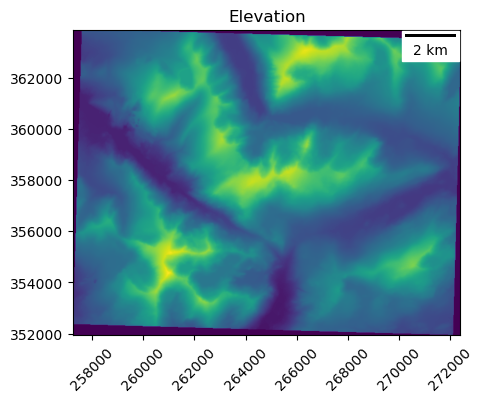

In [84]:
# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax,
    input_img=elevation_img,
    img_band=1,
    title_str="Elevation",
)
ax.tick_params(axis="x", labelrotation=45)

Image Data Size: 757 x 596


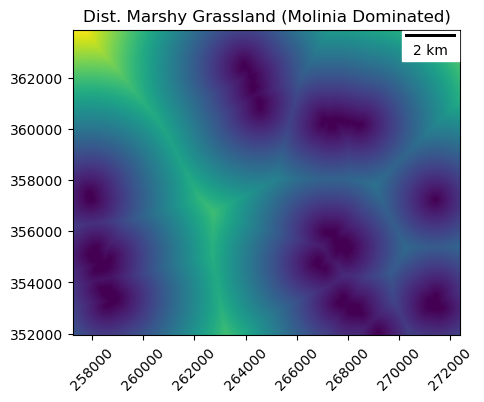

In [86]:
# Create a plot using the matplotlib library
fig, ax = plt.subplots(figsize=(5, 5))

rsgislib.tools.mapping.create_raster_cmap_img_map(
    ax,
    input_img="phase1_dist_imgs/Marshy_grassland_Molinia_dominated_dist.tif",
    img_band=1,
    title_str="Dist. Marshy Grassland (Molinia Dominated)",
)
ax.tick_params(axis="x", labelrotation=45)